Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


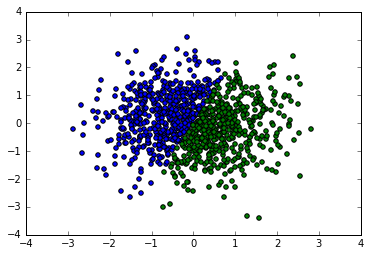

Cross validation:
8-fold [ 0.99206349  0.99206349  1.          1.          1.          1.          1.
  0.99193548]
10-fold [ 1.    0.99  1.    1.    1.    1.    1.    1.    1.    0.99]


In [586]:
# Problem 1
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import (linear_model,cross_validation)
import numpy as np

%pylab inline

data = pd.read_csv("./dataset-q-1.csv")

positive = data[data['C']==1]
negative = data[data['C']==-1]

plt.scatter(positive['D-0'].values, positive['D-1'].values, c='blue')
plt.scatter(negative['D-0'].values, negative['D-1'].values, c='green')
plt.show()

reg = linear_model.LogisticRegression()

reg.fit(data[['D-0','D-1']], data['C'])

print ("Cross validation:")
val8 = cross_validation.cross_val_score(reg, data[['D-0','D-1']], data['C'], cv=8)
val10 = cross_validation.cross_val_score(reg, data[['D-0','D-1']], data['C'], cv=10)
print ("8-fold",val8)
print ("10-fold",val10)

Populating the interactive namespace from numpy and matplotlib
               Rating          
Gender              F         M
Genre                          
Action       3.493620  3.450957
Adventure    3.302326  3.445230
Animation    3.585284  3.680851
Children's   3.285223  3.025701
Comedy       3.355991  3.315060
Crime        3.529825  3.837794
Documentary  3.225000  3.849315
Drama        3.534225  3.716949
Fantasy      1.000000       NaN
Film-Noir    3.414634  4.075949
Horror       3.335968  3.310136
Musical      4.039216  3.450000
Mystery      3.409091  3.570149
Romance      3.115385  3.620000
Sci-Fi       3.327869  3.332180
Thriller     2.952381  3.311258
War          1.000000  4.000000
Western      2.400000  3.766129
unknown           NaN  3.750000


`%matplotlib` prevents importing * from pylab and numpy


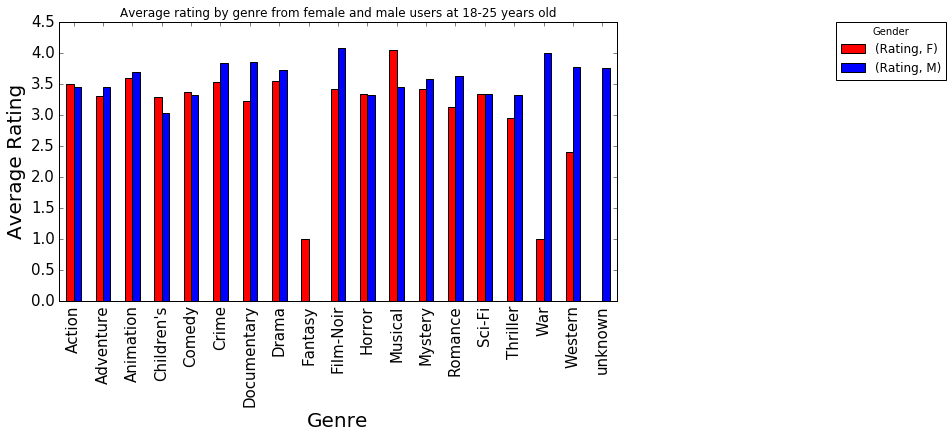

The 5 highest rated movies (based on average rating) released in 1995
                                 Rating
                                   mean
Name                                   
Someone Else's America (1995)  5.000000
Close Shave, A (1995)          4.491071
Usual Suspects, The (1995)     4.385768
Stonewall (1995)               4.200000
Braveheart (1995)              4.151515


In [607]:
# Problem 2
from numpy import *
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
from matplotlib import colors

# colors_ = list(six.iteritems(colors.cnames))

%pylab inline

dateparse = lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S')

data = pd.read_csv("movie/u.data",dtype=object, sep="\t",converters={"Rating":float}, parse_dates=['Time'], date_parser=dateparse)
genre = pd.read_csv("movie/u.genre",dtype=object, sep="|")
user = pd.read_csv("movie/u.users",dtype=object, sep="|",converters={"Age":int})
item = pd.read_csv("movie/u.item",dtype=object, sep="|")
item = item.rename(columns={'Genre': 'Genre-ID'})

item_data = pd.merge(item, data)
user_item_data = pd.merge(item_data, user)
all_data = pd.merge(user_item_data,genre)

###### problem b: For each genre, compare the average rating by female users between ages 18-25
###### (including 18, 25) to the average rating by male users between ages 18-25 (including 18,25). ####
user1825 = all_data[ (all_data["Age"] >=18) & (all_data["Age"] <=25)]

user_rate = pd.pivot_table(user1825, columns = ['Gender'], index = ['Genre'], values = ['Rating'], aggfunc = np.mean)

print (user_rate)
colors = ['red','blue']
user_rate.plot(kind='bar', color=colors, figsize=(10,5), fontsize=15)
plt.title("Average rating by genre from female and male users at 18-25 years old")
plt.legend(loc='upper right', title='Gender', bbox_to_anchor=(1.6, 1.02))
plt.ylabel('Average Rating', fontsize=20)
plt.xlabel('Genre', fontsize=20)
plt.show()


###### problem b: We wish obtain the 5 highest rated movies (based on average rating) released in 1995? ####
movie1995 = user_item_data[ user_item_data['Name'].str.contains("1995") ]
movie_stats = movie1995.groupby('Name').agg({'Rating': [np.mean]})
print ("The 5 highest rated movies (based on average rating) released in 1995")
print (movie_stats.sort_values([('Rating', 'mean')], ascending=False).head(5))

In [574]:
# Problem 3
import pandas as pd 
from sklearn.linear_model import Lasso
import numpy as np

test = pd.read_csv("dataset-q-3/dataset-test-3.csv",dtype=object, sep=",")
train = pd.read_csv("dataset-q-3/dataset-train-3.csv",dtype=object, sep=",")

train_data = train.iloc[0:, 0:100]
train_target = train['Value']

test_data = test.iloc[0:, 0:100]
test_target = test['Value']

lasso = Lasso()
lasso.fit(train_data,train_target)

pred_test = lasso.predict(test_data)

print ("\nLasso")

s = 0
for i in range(len(pred_test)):
    s_diff = (float(test_target[i]) - pred_test[i])**2
    s = s + s_diff
    

print ("Fit a model with full training dataset and predict Value on test set. MSE= ", s/len(pred_test))



Lasso
Fit a model with full training dataset and predict Value on test set. MSE=  11.56925382


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


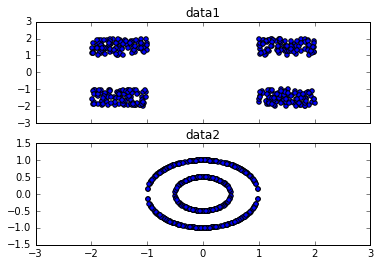

Data 1


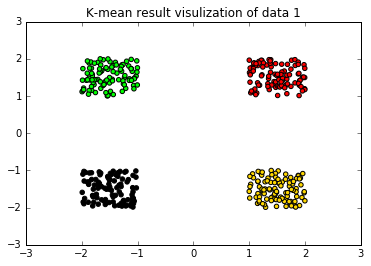

Data 2


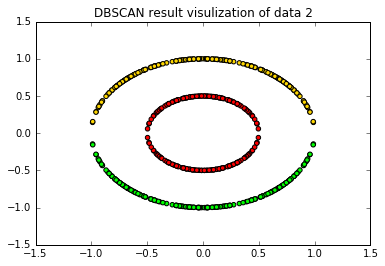

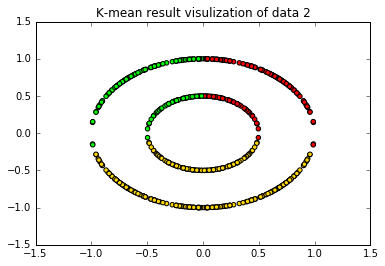

In [606]:
from sklearn.cluster import KMeans
from sklearn import cluster

%pylab inline

# Problem 4
data1 = pd.read_csv("./dataset-q-4/dataset-4-1.csv")
data2 = pd.read_csv("./dataset-q-4/dataset-4-2.csv")

f, axarr = plt.subplots(2, sharex=True)
axarr[0].scatter(data1['F1'], data1['F2'])
axarr[1].scatter(data2['F1'], data2['F2'])

axarr[0].set_title('data1')
axarr[1].set_title('data2')
plt.show()

# data1
print ("Data 1")
t1 = data1[['F1','F2']]
kmeans = KMeans(n_clusters=4).fit(t1)
colormap = np.array(['gold', 'lime', 'red', 'black', 'blue', 'pink'])

plt.title("K-mean result visulization of data 1")
plt.scatter(t1.F1, t1.F2, c=colormap[kmeans.labels_])
plt.show()

# data2
print ("Data 2")
t2 = data2[['F1','F2']]
lb = cluster.DBSCAN(eps=.2).fit_predict(t2)

plt.title("DBSCAN result visulization of data 2")
plt.scatter(t2.F1, t2.F2, c=colormap[lb])
plt.show()

kmeans = KMeans(n_clusters=3).fit(t2)

plt.title("K-mean result visulization of data 2")
plt.scatter(t2.F1, t2.F2, c=colormap[kmeans.labels_])
plt.show()

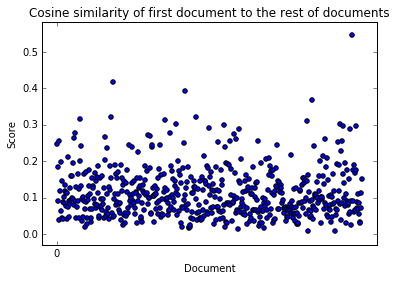

In [608]:
# Problem 5
from sklearn.datasets import fetch_20newsgroups
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from pandas.tools.plotting import scatter_matrix

newsgroups_train = fetch_20newsgroups(subset='train', categories=['sci.space'])

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)

sim = cosine_similarity(vectors[0:1], vectors)

name = []
for i in range(len(newsgroups_train['filenames'])):
    name.append(i)

    
plt.scatter(name[1:],sim[0][1:])
plt.title("Cosine similarity of first document to the rest of documents")
plt.xlabel("Document")
plt.ylabel("Score")
plt.xticks([w*1000 for w in range(len(name)-1)], name)
plt.autoscale(tight=True)
plt.show()